## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [41]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

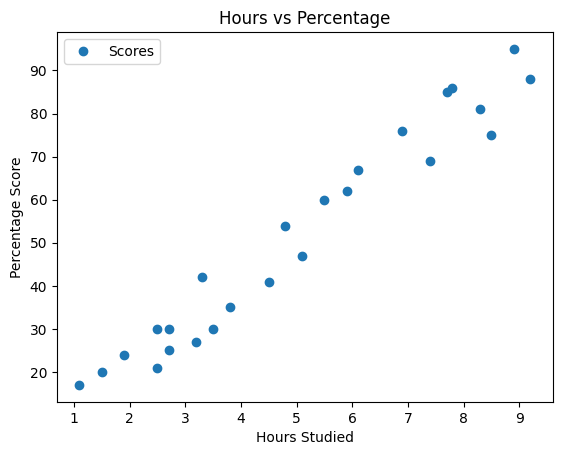

In [20]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

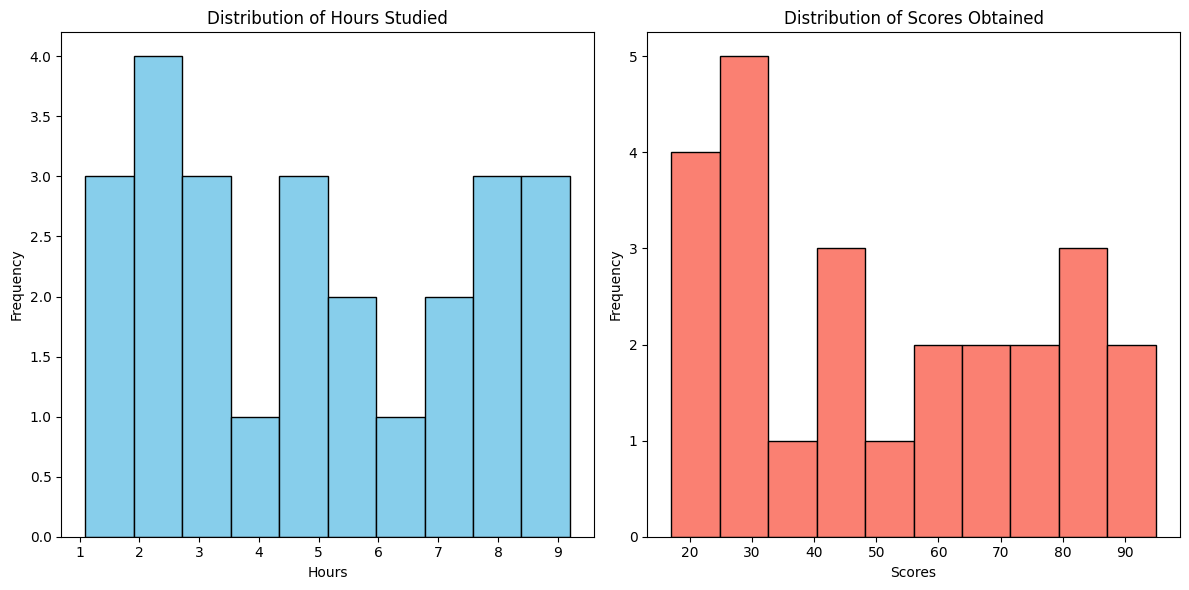

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(s_data['Hours'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Studied')

plt.subplot(1, 2, 2)
plt.hist(s_data['Scores'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores Obtained')

plt.tight_layout()
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [23]:
#splittin in 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


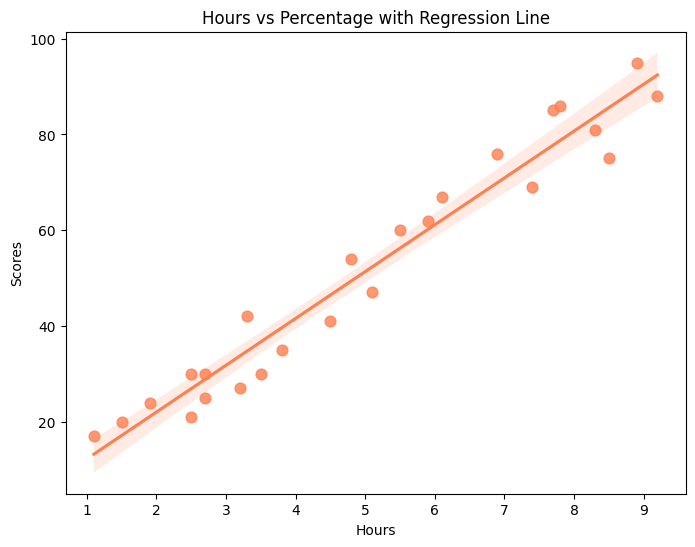

In [21]:
# Plotting the regression line
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x='Hours', y='Scores', data=s_data, scatter_kws={'s': 60}, color='coral')
plt.title('Hours vs Percentage with Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
print("Training score:", regressor.score(X_train, y_train))
print("Testing score:", regressor.score(X_test, y_test))

Training score: 0.9515510725211552
Testing score: 0.9454906892105354


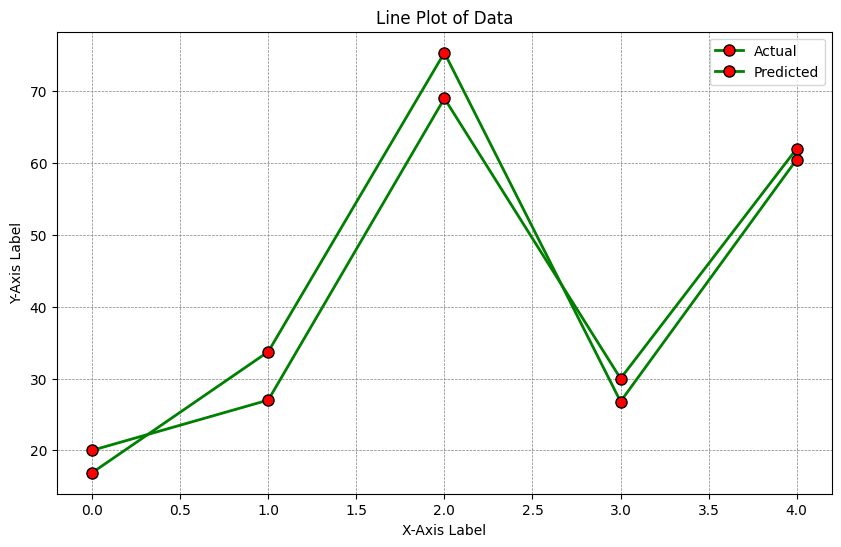

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind='line', ax=ax, linewidth=2, marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black', color='green')

plt.title('Line Plot of Data')
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

ax.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')

plt.legend(labels=df.columns)

plt.show()


In [35]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [38]:
from sklearn import metrics


mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-squared (R²):', r_squared)


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-squared (R²): 0.9454906892105354
